<a href="https://colab.research.google.com/github/yhk775206/NLPex/blob/master/a_imgfolderLoad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.utils.data as data
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from torch.autograd import Variable

## 1. train 데이터로 불러올 폴더 지정

In [ ]:
# 네트워크에 들어갈 이미지 크기
#  ㄴ네트워크에는 동일한 크기의 이미지만 넣을 수 있음. 
#  ㄴGPU 병렬처리 때문
imgsize = 128  

In [4]:
# 폴더 이름
img_dir =  "drive/MyDrive/my_catdog/"  #"./images/"  # "../../images/cats/"

# 해당 폴더를 train 데이터로 지정
my_train = dset.ImageFolder(img_dir, transforms.Compose([    
            # ①②CCrop
#             transforms.CenterCrop(size=imgsize), # ① CenterCrop
#             transforms.RandomHorizontalFlip(),   # ② RandomHorizontalFlip   
    
#             # ①(512)③②RCrop  <-- Best !!
#             transforms.CenterCrop(imgsize*2),     # ① CenterCrop(512)
#             transforms.RandomCrop(imgsize),       # ③ RandomCrop
#             transforms.RandomHorizontalFlip(),    # ② RandomHorizontalFlip
    
            # ①(512)④②RSCrop
#             transforms.CenterCrop(imgsize*2),       # ① CenterCrop(512)
#             transforms.RandomSizedCrop(imgsize),    # ④ RandomSizedCrop
#             transforms.RandomHorizontalFlip(),      # ② RandomHorizontalFlip
    
            transforms.Resize((imgsize, imgsize)),
            transforms.ToTensor()
            ]))

# my_train 개수 출력해보기
print(my_train.__len__())

10


## 2. train 데이터 정보 출력해보기

In [6]:
nclass = len(my_train.classes)
print("# of classes(클래스 개수): %d" %nclass)

print("클래이 이름:", my_train.classes)
print("클래스별 인덱스:", my_train.class_to_idx)
print("my_train 개수:", my_train.__len__())

# of classes(클래스 개수): 2
클래이 이름: ['cats', 'dogs']
클래스별 인덱스: {'cats': 0, 'dogs': 1}
my_train 개수: 10


## 3. train 데이터 그려보기

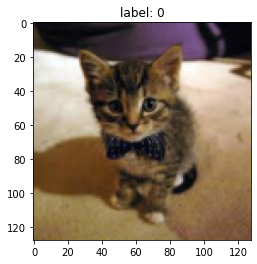

(128, 128, 3)


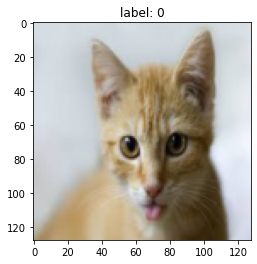

(128, 128, 3)


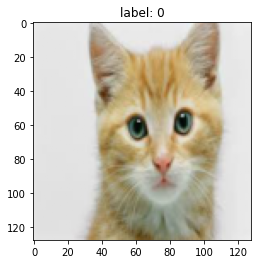

(128, 128, 3)


In [28]:
for i in range(3):
    img = my_train[i][0].numpy()  # image 타입을 numpy 로 변환 (3, width, height)    
    img = np.transpose(img, (1, 2, 0)) # (3, width, height) -> (width, height, 3)

    plt.title("label: %d" %my_train[i][1] )
    plt.imshow(img)
    plt.show()

    print(img.shape)

## 4. 데이터 로드하기
학습시킬 때 batch_size 단위 묶음으로 로드하기 위함

In [30]:
batch_size= 3

In [33]:
train_loader = data.DataLoader(my_train, batch_size=batch_size,
                            shuffle=False, num_workers=2,
                            drop_last=True)  # batch_size 만큼 나눌 때 나머지는 버려라

## 5. 데이터 로더 사용하기

[0]
한 번에 로드되는 데이터 크기: 3
torch.Size([3, 3, 128, 128])
torch.Size([3])


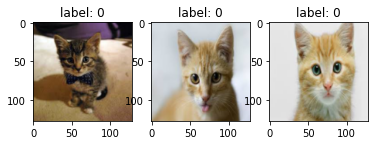

[1]
한 번에 로드되는 데이터 크기: 3
torch.Size([3, 3, 128, 128])
torch.Size([3])


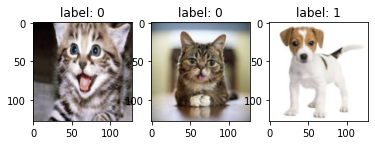

[2]
한 번에 로드되는 데이터 크기: 3
torch.Size([3, 3, 128, 128])
torch.Size([3])


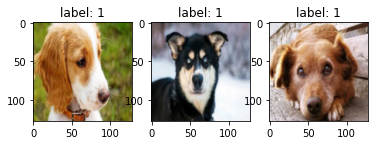

In [34]:
n = 3  # 샘플로 그려볼 데이터 개수
for i, [imgs, labels] in enumerate(train_loader):  # batch_size 만큼
    if i>5:
        break
        
    print ("[%d]" %i)
    print ("한 번에 로드되는 데이터 크기:", len(imgs))
    
    # GPU 에 로드되기 위함. 만약 CPU로 설정되어 있다면 자동으로(?) CPU로 로드됨
    x = Variable(imgs)#.cuda()     # (batch_size, 3, 28, 28)
    y_ = Variable(labels)#.cuda()  # (batch_size)
    
    print(x.shape)
    print(y_.shape)
    
    # 그리기
    for j in range(n):
        img = imgs[j].numpy()  # image 타입을 numpy 로 변환 (3, width, height)    
        img = np.transpose(img, (1, 2, 0)) # (3, width, height) -> (width, height, 3)
        
        plt.subplot(1, n, j+1)  # (1,3) 형태 플랏의 j 번째 자리에 그리겠다
        plt.imshow(img) #, cmap='gray')
        plt.title("label: %d" %labels[j] )        
    plt.show()